In [1]:
import numpy as np #note that periodic BCs have yet to be added in
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg 
import pyqg.diagnostic_tools as tools
import seaborn as sns

%matplotlib inline

In [2]:
eddy_model = pyqg.QGModel(nx=64, dt=3600.0, tmax=311040000.0, twrite=10000, tavestart=155520000.0) #defaults match up to Ross paper 
#twrite : Interval for cfl writeout (units: number of timesteps)
#tavestart : Start time for averaging (units: model time)

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [3]:
# after initial run, generate snapshots of model

def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

eddy_model_highRes = generate_snapshots(eddy_model)
eddy_model_highRes

INFO: Step: 10000, Time: 3.60e+07, KE: 1.96e-05, CFL: 0.009
INFO: Step: 20000, Time: 7.20e+07, KE: 4.81e-04, CFL: 0.045
INFO: Step: 30000, Time: 1.08e+08, KE: 5.06e-04, CFL: 0.045
INFO: Step: 40000, Time: 1.44e+08, KE: 4.84e-04, CFL: 0.045
INFO: Step: 50000, Time: 1.80e+08, KE: 4.61e-04, CFL: 0.043
INFO: Step: 60000, Time: 2.16e+08, KE: 4.65e-04, CFL: 0.063
INFO: Step: 70000, Time: 2.52e+08, KE: 4.64e-04, CFL: 0.047
INFO: Step: 80000, Time: 2.88e+08, KE: 4.92e-04, CFL: 0.047


<xarray.Dataset>
Dimensions:            (time: 87, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/32)
    q                  (time, lev, y, x) float64 8.821e-07 ... -1.423e-06
    u                  (time, lev, y, x) float64 0.0 0.0 ... -0.00861 -0.007082
    v                  (time, lev, y, x) float64 0.0 0.0 ... -0.002291 -0.0035
    ufull              (time, lev, y, x) float64 0.025 0.025 ... -0.007082
    vfull              (time, lev, y, x) float64 0.0 0.0 ... -0.002291 -0.0035
    qh                 (time, lev, l, k) complex128 (0.002521111233473065+0j)...
    ...                 ...
    ENSgenspec         (time, l, k) float64 nan nan nan ... -7.318e-52 9.523e-63
    ENSfrictionspec    (time, l, k) float64 nan nan ... -5.582e-51 -2.619e-60
    APEgenspec         (time, l, k) float64 nan nan nan ... -1.647e-43 2.143e-54
    APEflux            (time, l, k) float64 nan nan nan ... 6.009e-29 1.176e-33
    KEflux             (time, l, k) float64 nan nan nan ... 2.422e-27 4.291e-32
    APEgen             (time) float64 nan nan nan ... 6.475e-11 6.456e-11
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         3600.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [4]:
# write data to scratch bucket after initial run

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
eddy_model_highRes.to_zarr('gs://leap-scratch/panalluri/scalar/eddy_lowRes.zarr')  # write data

In [2]:
import os
import xarray as xr
eddy_model_highRes = xr.open_zarr("gs://leap-scratch/panalluri/scalar/eddy_lowRes.zarr")  # load example data
eddy_model_highRes

<xarray.Dataset>
Dimensions:            (time: 87, l: 64, k: 33, lev: 2, y: 64, x: 64, lev_mid: 1)
Coordinates:
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * time               (time) float64 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables: (12/32)
    APEflux            (time, l, k) float64 dask.array<chunksize=(44, 32, 33), meta=np.ndarray>
    APEgen             (time) float64 dask.array<chunksize=(87,), meta=np.ndarray>
    APEgenspec         (time, l, k) float64 dask.array<chunksize=(44, 32, 33), meta=np.ndarray>
    Dissspec           (time, l, k) float64 dask.array<chunksize=(44, 32, 33), meta=np.ndarray>
    EKE                (time, lev) float64 dask.array<chunksize=(87, 2), meta=np.ndarray>
    EKEdiss            (time) float64 dask.array<chunksize=(87,), meta=np.ndarray>
    ...                 ...
    u                  (time, lev, y, x) float64 dask.array<chunksize=(44, 1, 32, 32), meta=np.ndarray>
    ufull              (time, lev, y, x) float64 dask.array<chunksize=(44, 1, 32, 32), meta=np.ndarray>
    uh                 (time, lev, l, k) complex128 dask.array<chunksize=(44, 1, 32, 17), meta=np.ndarray>
    v                  (time, lev, y, x) float64 dask.array<chunksize=(44, 1, 32, 32), meta=np.ndarray>
    vfull              (time, lev, y, x) float64 dask.array<chunksize=(44, 1, 32, 32), meta=np.ndarray>
    vh                 (time, lev, l, k) complex128 dask.array<chunksize=(44, 1, 32, 17), meta=np.ndarray>
Attributes: (12/23)
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       1.5e-11
    pyqg:del2:       0.8
    pyqg:delta:      0.25
    ...              ...
    pyqg:tavestart:  155520000.0
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           pyqg: Python Quasigeostrophic Model

In [3]:
u_lev0 = eddy_model_highRes.u.isel(lev=0)
v_lev0 = eddy_model_highRes.v.isel(lev=0)
u_lev1 = eddy_model_highRes.u.isel(lev=1)
v_lev1 = eddy_model_highRes.v.isel(lev=1)

In [4]:
xvals = eddy_model_highRes.x
yvals = eddy_model_highRes.y

In [5]:
del_x = np.diff(xvals).mean()
del_y = np.diff(yvals).mean()
del_y

15625.0

In [6]:
del_t = np.diff(eddy_model_highRes.time).mean()
time = u_lev0.time
del_t = del_t / 1000
del_t

3600.0

In [8]:
domain_size = u_lev0[0].shape
domain_x = domain_size[0]
domain_y = domain_size[1]

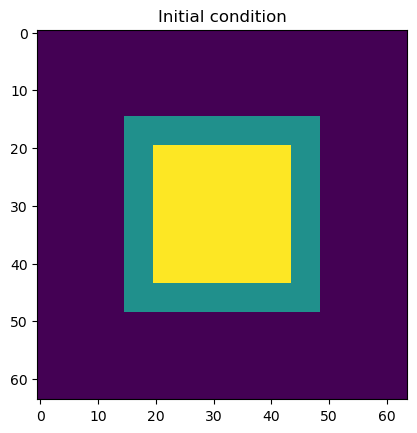

In [9]:
#scalar initial condition

xy_grid = np.zeros((domain_x, domain_y))
xy_grid[20:44, 20:44] = 1.0
xy_grid[15:20, 15:49] = 0.5
xy_grid[15:49, 15:20] = 0.5
xy_grid[15:49, 44:49] = 0.5
xy_grid[44:49, 15:49] = 0.5
plt.imshow(xy_grid)
plt.title("Initial condition")
scalar_init = xy_grid 

# Top layer

In [10]:
U = eddy_model_highRes.isel(lev=0).u[-1]
V = eddy_model_highRes.isel(lev=0).v[-1]

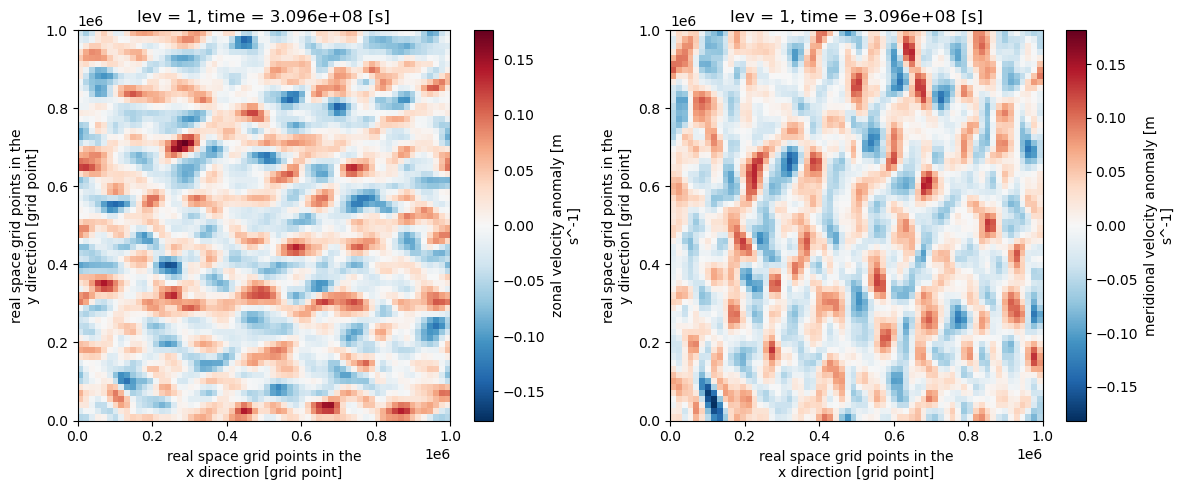

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
U.plot()

plt.subplot(122)
V.plot()

plt.tight_layout()

In [12]:
def RHS(U, V, C, dx, dy, k):
    
    dCdx = (np.roll(C, -1, axis=1) - np.roll(C, 1, axis=1) )/2/dx
    dCdy = (np.roll(C, -1, axis=0) - np.roll(C, 1, axis=0) )/2/dy
    
    d2Cdx2 = (np.roll(C, -1, axis=1) - 2*np.roll(C, 0, axis=1) + np.roll(C, 1, axis=1) )/(dx**2)
    d2Cdy2 = (np.roll(C, -1, axis=0) - 2*np.roll(C, 0, axis=0) + np.roll(C, 1, axis=0) )/(dy**2)
    
    RHS = -(U*dCdx + V*dCdy) + k*(d2Cdx2 + d2Cdy2)
    
    return RHS

In [13]:
1/(15625**2)

4.096e-09

In [71]:
# Time loop 
dt = 3600. 
dt_scalar = 10*dt
dx =  -7812.5 +  23437.5
dy = dx

Nt = 100
domain_x = 64
domain_y = 64

k = 300

scalar_mat = np.zeros((Nt+3, domain_x, domain_y), dtype='float64')

# intialize
scalar_mat[0,:,:] = scalar_init
# first timestep from Euler
scalar_mat[1, :, :] = scalar_mat[0, :, :] + dt_scalar* RHS(U,V, scalar_mat[0, :, :], dx, dy, k)
# second timestep from AB2
scalar_mat[2, :, :] = scalar_mat[1, :, :] + 0.5*dt_scalar* ( 3*RHS(U,V, scalar_mat[1, :, :], dx, dy, k) - RHS(U,V, scalar_mat[0, :, :], dx, dy, k) )

#AB3 timestepping
for i in range(0,Nt): 
    
    scalar_mat[i+3, :, :] = scalar_mat[i+2, :, :] + (1/12)*dt_scalar* ( 23*RHS(U,V, scalar_mat[i+2, :, :], dx, dy, k) - 16*RHS(U,V, scalar_mat[i+1, :, :], dx, dy, k) + 5*RHS(U,V, scalar_mat[i, :, :], dx, dy, k) )

In [56]:
scalar_mat_xr = xr.DataArray(scalar_mat, dims=['time', 'y', 'x'], coords={'x': eddy_model_highRes.x, 'y':eddy_model_highRes.y})

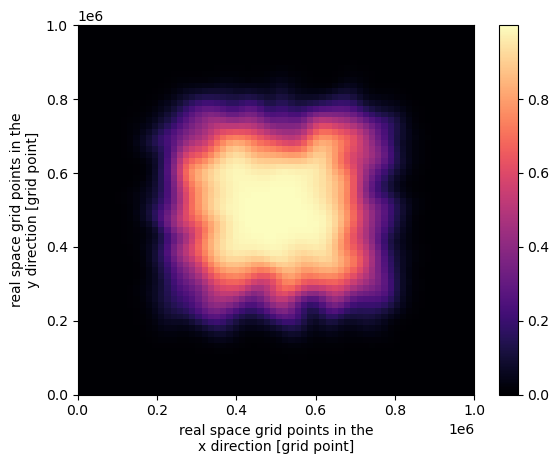

In [70]:
scalar_mat_xr.isel(time=-1).plot(cmap='magma')

# Bottom layer

In [35]:
U = eddy_model_highRes.isel(lev=1).u[-1]
V = eddy_model_highRes.isel(lev=1).v[-1]

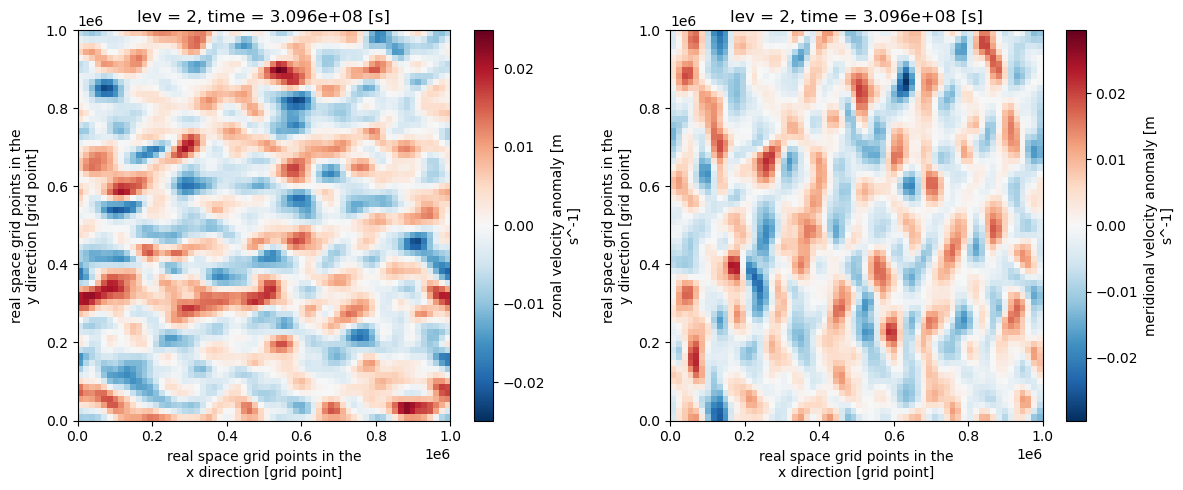

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
U.plot()

plt.subplot(122)
V.plot()

plt.tight_layout()

In [73]:
# Time loop 
dt = 3600. 
dt_scalar = 10*dt
dx =  -7812.5 +  23437.5
dy = dx

Nt = 100
domain_x = 64
domain_y = 64

k = 250

scalar_mat2 = np.zeros((Nt+3, domain_x, domain_y), dtype='float64')

# intialize
scalar_mat2[0,:,:] = scalar_init
# first timestep from Euler
scalar_mat2[1, :, :] = scalar_mat2[0, :, :] + dt_scalar* RHS(U,V, scalar_mat2[0, :, :], dx, dy, k)
# second timestep from AB2
scalar_mat2[2, :, :] = scalar_mat2[1, :, :] + 0.5*dt_scalar* ( 3*RHS(U,V, scalar_mat2[1, :, :], dx, dy, k) - RHS(U,V, scalar_mat2[0, :, :], dx, dy, k) )

#AB3 timestepping
for i in range(0,Nt): 
    
    scalar_mat2[i+3, :, :] = scalar_mat2[i+2, :, :] + (1/12)*dt_scalar* ( 23*RHS(U,V, scalar_mat2[i+2, :, :], dx, dy, k) - 16*RHS(U,V, scalar_mat2[i+1, :, :], dx, dy, k) + 5*RHS(U,V, scalar_mat2[i, :, :], dx, dy, k) )

In [74]:
scalar_mat2_xr = xr.DataArray(scalar_mat2, dims=['time', 'y', 'x'], coords={'x': eddy_model_highRes.x, 'y':eddy_model_highRes.y})

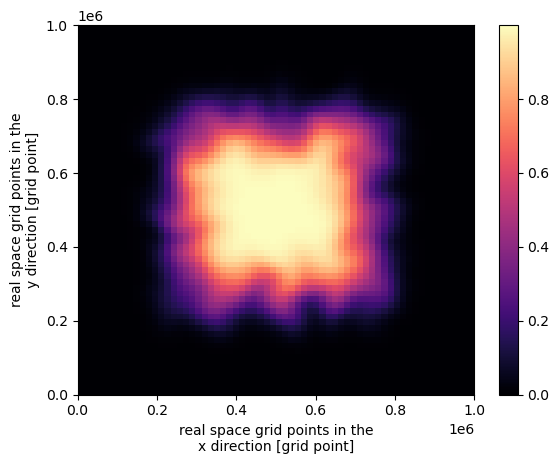

In [79]:
scalar_mat2_xr.isel(time=-1).plot(cmap='magma')

In [80]:
# Specific for animation
# Can be put in a separate script
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import cmocean

# Thanks to Pavel for this function :) 
def create_animation(fun, idx, filename='my-animation.gif', dpi=200, FPS=18, loop=0):
    '''
    See https://pythonprogramming.altervista.org/png-to-gif/
    fun(i) - a function creating one snapshot, has only one input:
        - number of frame i
    idx - range of frames, i in idx
    FPS - frames per second
    filename - animation name
    dpi - set 300 or so to increase quality
    loop - number of repeats of the gif
    '''
    frames = []
    for i in idx:
        fun(i)
        plt.savefig('.frame.png', dpi=dpi, bbox_inches='tight')
        plt.close()
        frames.append(Image.open('.frame.png').convert('RGB'))
        print(f'Frame {i} is created', end='\r')
    os.system('rm .frame.png')
    # How long to persist one frame in milliseconds to have a desired FPS
    duration = 1000 / FPS
    print(f'Animation at FPS={FPS} will last for {len(idx)/FPS} seconds')
    frames[0].save(
        filename, format='GIF',
        append_images=frames[1:],
        save_all=True,
        duration=duration,
        loop=loop)


In [81]:
def plot_fun(idT): 
    scalar_mat_xr.isel(time=idT).plot(cmap='magma')
    plt.title("Top Layer Scalar Values")

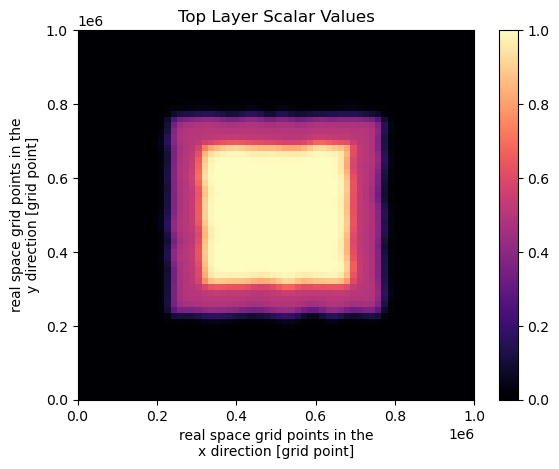

In [82]:
plot_fun(10)

In [83]:
create_animation(plot_fun, range(0, 103), 'topLayerScalars.gif', dpi=100) 

Animation at FPS=18 will last for 5.722222222222222 seconds


In [84]:
def plot_fun2(idT): 
    scalar_mat2_xr.isel(time=idT).plot(cmap='magma')
    plt.title("Bottom Layer Scalar Values")

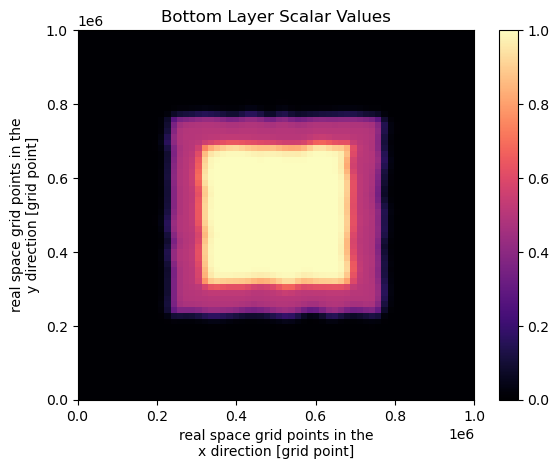

In [85]:
plot_fun2(10)

In [86]:
create_animation(plot_fun2, range(0, 103), 'bottomLayerScalars.gif', dpi=100) 

Animation at FPS=18 will last for 5.722222222222222 seconds
